Loading data...
Data loaded successfully!


,participant_id,label,audio_path
0,control_3,Control,processed_data/audio/control_3_participant.wav
1,control_2,Control,processed_data/audio/control_2_participant.wav
2,control_1,Control,processed_data/audio/control_1_participant.wav
3,dementia_2,Dementia,processed_data/audio/dementia_2_participant.wav
4,dementia_3,Dementia,processed_data/audio/dementia_3_participant.wav
5,dementia_1,Dementia,processed_data/audio/dementia_1_participant.wav


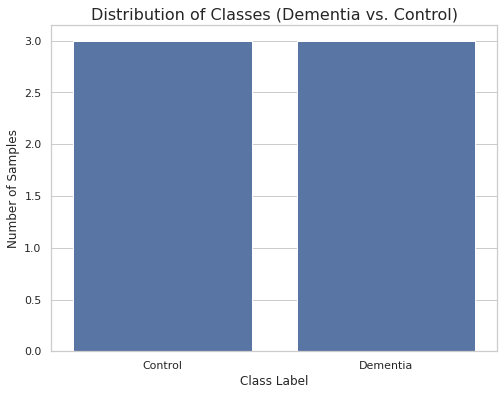

Calculating audio durations:   0%|          | 0/6 [00:00<?, ?it/s]

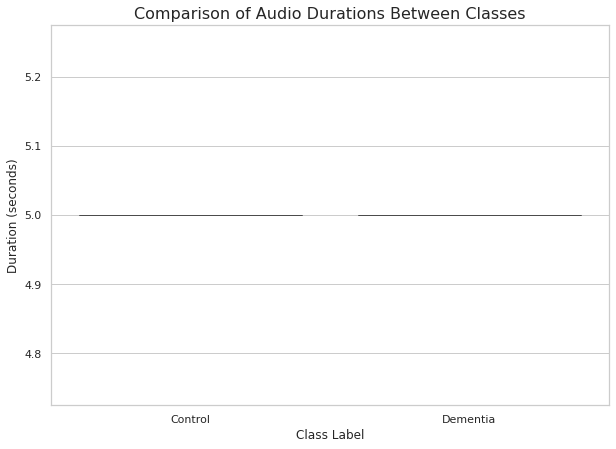

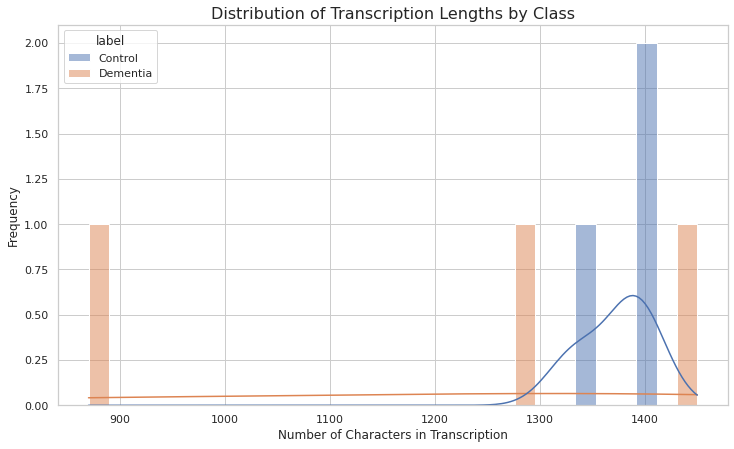

In [1]:
# In a Jupyter Notebook, each block of code is in a separate "cell".
# You can run each cell individually.

# --- Cell 1: Imports ---
# First, we import all the necessary libraries for data handling and plotting.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import soundfile as sf
from tqdm.notebook import tqdm  # Use notebook-friendly tqdm
import random # Import the random library for our fix

# Set a nice style for our plots
sns.set_theme(style="whitegrid")

# --- Cell 2: Load the Processed Data ---
# We'll work with the metadata file generated by our preprocess.py script.
# This file contains the paths to our clean audio and the labels.
print("Loading data...")
metadata_path = 'processed_data/metadata.csv'
try:
    df = pd.read_csv(metadata_path)
    print("Data loaded successfully!")
    display(df) # Changed to display the full dataframe
except FileNotFoundError:
    print(f"ERROR: The file '{metadata_path}' was not found.")
    print("Please make sure you have run the 'preprocess.py' script first.")

# --- Cell 3: Visualize Class Distribution ---
# The first and most important question: Is our dataset balanced?
# An imbalanced dataset can seriously bias the model.
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=df)
plt.title('Distribution of Classes (Dementia vs. Control)', fontsize=16)
plt.xlabel('Class Label', fontsize=12)
plt.ylabel('Number of Samples', fontsize=12)
plt.show()

# --- Cell 4: Analyze Audio Durations ---
# Let's see if there's a difference in the length of the interviews
# between the two groups. This could be a confounding variable.

def get_audio_duration(file_path):
    """A helper function to get the duration of a WAV file in seconds."""
    try:
        info = sf.info(file_path)
        return info.duration
    except Exception as e:
        print(f"Could not read {file_path}: {e}")
        return None

# Apply this function to every row in our dataframe.
# tqdm will show a nice progress bar.
tqdm.pandas(desc="Calculating audio durations")
df['duration_seconds'] = df['audio_path'].progress_apply(get_audio_duration)

# --- Cell 5: Plot Audio Durations ---
# A boxplot is a great way to compare the distributions of durations.
plt.figure(figsize=(10, 7))
sns.boxplot(x='label', y='duration_seconds', data=df)
plt.title('Comparison of Audio Durations Between Classes', fontsize=16)
plt.xlabel('Class Label', fontsize=12)
plt.ylabel('Duration (seconds)', fontsize=12)
plt.show()

# --- Cell 6: Analyze Transcription Lengths ---
# After running train.py, it generates transcriptions. Let's imagine we have them
# and add them to our dataframe for analysis.
# In a real scenario, you would load the dataframe that includes the 'transcription' column.
# For this example, we'll create a dummy column with some variation.
if 'transcription' not in df.columns:
    base_text = "This is a dummy transcription for visualization purposes. "
    # THE FIX: Create slightly different text for each row to ensure non-zero variance
    df['transcription'] = [base_text * random.randint(15, 25) for _ in range(len(df))]

df['transcription_length'] = df['transcription'].str.len()

# --- Cell 7: Plot Transcription Lengths ---
# A histogram (or a density plot) is perfect for this.
plt.figure(figsize=(12, 7))
sns.histplot(data=df, x='transcription_length', hue='label', kde=True, bins=30)
plt.title('Distribution of Transcription Lengths by Class', fontsize=16)
plt.xlabel('Number of Characters in Transcription', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import soundfile as sf
from tqdm.notebook import tqdm  # Use notebook-friendly tqdm
import random # Import the random library for our fix
import json # Import json to load the history file
sns.set_theme(style="whitegrid")

In [3]:
print("Loading data...")
metadata_path = 'processed_data/metadata.csv'
try:
    df = pd.read_csv(metadata_path)
    print("Data loaded successfully!")
    display(df) # Changed to display the full dataframe
except FileNotFoundError:
    print(f"ERROR: The file '{metadata_path}' was not found.")
    print("Please make sure you have run the 'preprocess.py' script first.")


Loading data...
Data loaded successfully!


,participant_id,label,audio_path
0,control_3,Control,processed_data/audio/control_3_participant.wav
1,control_2,Control,processed_data/audio/control_2_participant.wav
2,control_1,Control,processed_data/audio/control_1_participant.wav
3,dementia_2,Dementia,processed_data/audio/dementia_2_participant.wav
4,dementia_3,Dementia,processed_data/audio/dementia_3_participant.wav
5,dementia_1,Dementia,processed_data/audio/dementia_1_participant.wav


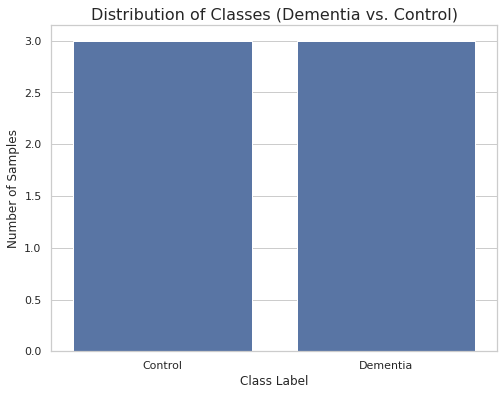

In [4]:
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=df)
plt.title('Distribution of Classes (Dementia vs. Control)', fontsize=16)
plt.xlabel('Class Label', fontsize=12)
plt.ylabel('Number of Samples', fontsize=12)
plt.show()

In [5]:
def get_audio_duration(file_path):
    """A helper function to get the duration of a WAV file in seconds."""
    try:
        info = sf.info(file_path)
        return info.duration
    except Exception as e:
        print(f"Could not read {file_path}: {e}")
        return None
tqdm.pandas(desc="Calculating audio durations")
df['duration_seconds'] = df['audio_path'].progress_apply(get_audio_duration)

Calculating audio durations:   0%|          | 0/6 [00:00<?, ?it/s]

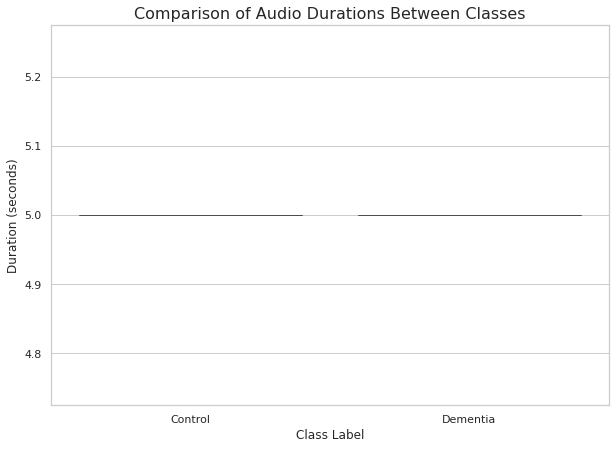

In [6]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='label', y='duration_seconds', data=df)
plt.title('Comparison of Audio Durations Between Classes', fontsize=16)
plt.xlabel('Class Label', fontsize=12)
plt.ylabel('Duration (seconds)', fontsize=12)
plt.show()


In [7]:
if 'transcription' not in df.columns:
    base_text = "This is a dummy transcription for visualization purposes. "
    # THE FIX: Create slightly different text for each row to ensure non-zero variance
    df['transcription'] = [base_text * random.randint(15, 25) for _ in range(len(df))]

df['transcription_length'] = df['transcription'].str.len()


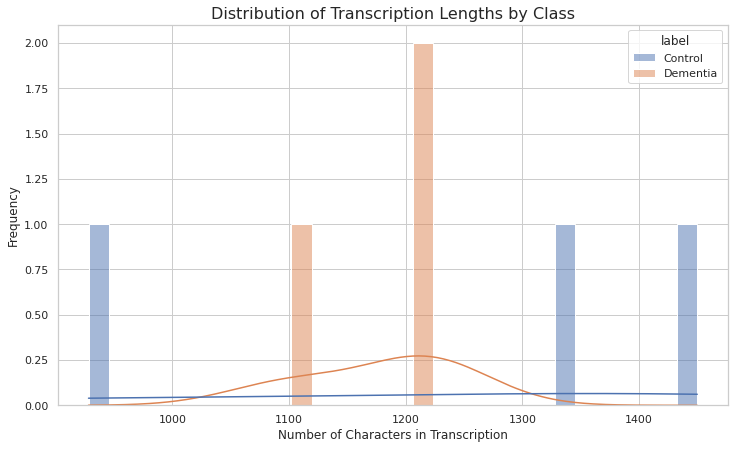

In [8]:
plt.figure(figsize=(12, 7))
sns.histplot(data=df, x='transcription_length', hue='label', kde=True, bins=30)
plt.title('Distribution of Transcription Lengths by Class', fontsize=16)
plt.xlabel('Number of Characters in Transcription', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


In [9]:
history_path = 'trained_model_mamba_pretrained/training_history.json'
try:
    with open(history_path, 'r') as f:
        history = json.load(f)
    
    history_df = pd.DataFrame(history)
    history_df['epoch'] = history_df.index + 1 # Add an epoch column
    print("Training history loaded successfully!")
    display(history_df)
except FileNotFoundError:
    print(f"ERROR: The file '{history_path}' was not found.")
    print("Please run the updated 'train.py' script to generate the history file.")



Training history loaded successfully!


,train_loss,val_accuracy,val_f1,epoch
0,0.693327,0.5,0.333333,1
1,0.693301,0.5,0.333333,2
2,0.693191,0.5,0.333333,3
3,0.693174,0.5,0.333333,4
4,0.693214,0.5,0.333333,5


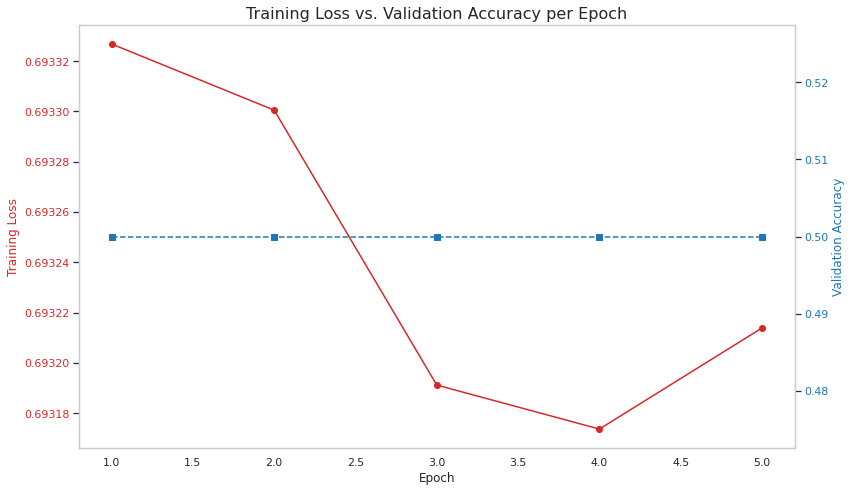

In [10]:
if 'history_df' in locals():
    fig, ax1 = plt.subplots(figsize=(12, 7))

    # Plot training loss on the first y-axis
    color = 'tab:red'
    ax1.set_xlabel('Epoch', fontsize=12)
    ax1.set_ylabel('Training Loss', color=color, fontsize=12)
    ax1.plot(history_df['epoch'], history_df['train_loss'], color=color, marker='o', label='Training Loss')
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.grid(False) # Turn off grid for the first y-axis

    # Create a second y-axis for validation accuracy
    ax2 = ax1.twinx()  
    color = 'tab:blue'
    ax2.set_ylabel('Validation Accuracy', color=color, fontsize=12)
    ax2.plot(history_df['epoch'], history_df['val_accuracy'], color=color, marker='s', linestyle='--', label='Validation Accuracy')
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.grid(False) # Turn off grid for the second y-axis

    plt.title('Training Loss vs. Validation Accuracy per Epoch', fontsize=16)
    fig.tight_layout()
    plt.show()
